In [2]:
pip install matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
x_train = np.loadtxt('input.csv',delimiter=',')
y_train = np.loadtxt('labels.csv',delimiter=',')

x_test = np.loadtxt('input_test.csv',delimiter=',')
y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [5]:
x_train = x_train.reshape(len(x_train),100, 100, 3)
Y_train = y_train.reshape(len(y_train),1)
x_test = x_test.reshape(len(x_test),100, 100, 3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

datagen= ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

In [6]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",x_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of x_test:",x_test.shape)

shape of x_train: (2000, 100, 100, 3)
shape of y_train: (2000, 100, 100, 3)
shape of x_test: (400, 100, 100, 3)
shape of x_test: (400, 100, 100, 3)


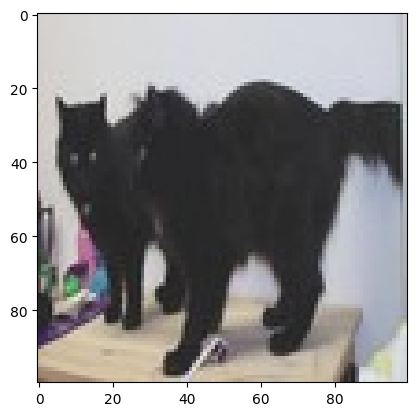

In [7]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\Harini yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential()

model.add(Input(shape=(100, 100, 3)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.5245 - loss: 0.7039 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5090 - loss: 0.6924 - val_accuracy: 0.5450 - val_loss: 0.6846
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5650 - loss: 0.6806 - val_accuracy: 0.5825 - val_loss: 0.6683
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5620 - loss: 0.6748 - val_accuracy: 0.5900 - val_loss: 0.6754
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.5740 - loss: 0.6705 - val_accuracy: 0.6175 - val_loss: 0.6743
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.5805 - loss: 0.6736 - val_accuracy: 0.6500 - val_loss: 0.6498
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.6060 - loss: 0.6580 - val_accuracy: 0.6275 - val_loss: 0.6494
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6000 - loss: 0.6576 - val_accuracy: 0.5500 - 

In [14]:
model .evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7525 - loss: 0.5121


[0.5121482014656067, 0.7524999976158142]

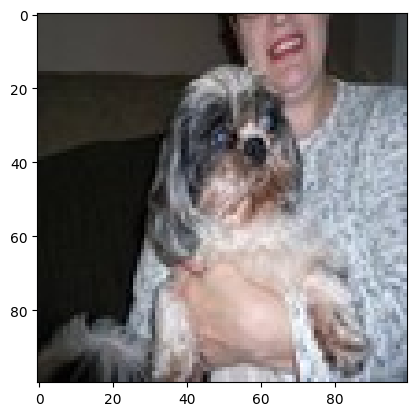

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Our model says it is a : cat


In [19]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if (y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

In [20]:
model.save('model.h5')
print('Saved model to model.h5')

Saved model to model.h5
